In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from pandarallel import pandarallel
pandarallel.initialize(os.cpu_count()-1, progress_bar=True)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
data = pd.read_csv('./dataset/4.Fraud/Fraud.csv')
ip = pd.read_csv('./dataset/4.Fraud/IpAddress_to_Country.csv')

In [3]:
ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [4]:
def ip_to_country(ip_address:int):
    try:
        return ip[(ip['lower_bound_ip_address'] <= ip_address) & (ip['upper_bound_ip_address'] >= ip_address)]['country'].values[0]
    except IndexError:
        return 'Unknown'

In [5]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
data['country'] = data['ip_address'].parallel_apply(ip_to_country)

In [7]:
data['signup_time'] = pd.to_datetime(data['signup_time'])
data['purchase_time'] = pd.to_datetime(data['purchase_time'])
data['dtime'] = (data['purchase_time'] - data['signup_time']).dt.total_seconds()

In [ ]:
# append the number of times the device/ip address was used
data['device_count'] = data['device_id'].map(data['device_id'].value_counts())
data['ip_count'] = data['ip_address'].map(data['ip_address'].value_counts())

In [15]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
 11  country         151112 non-null  object        
 12  dtime           151112 non-null  float64       
 13  device_count    151112 non-null  int64         
 14  ip_count        151112 non-null  int

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,dtime,device_count,ip_count
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0,12,8
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,492085.0,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0,1,1


In [16]:
data.describe()

,user_id,signup_time,purchase_time,purchase_value,age,ip_address,class,dtime,device_count,ip_count
count,151112.000000,151112,151112,151112.000000,151112.000000,1.511120e+05,151112.000000,1.511120e+05,151112.000000,151112.000000
mean,200171.040970,2015-04-20 00:56:09.511329280,2015-06-16 02:56:38.759952896,36.935372,33.140704,2.152145e+09,0.093646,4.932029e+06,1.684367,1.304185
min,2.000000,2015-01-01 00:00:42,2015-01-01 00:00:44,9.000000,18.000000,5.209350e+04,0.000000,1.000000e+00,1.000000,1.000000
25%,100642.500000,2015-02-18 09:52:48.500000,2015-04-18 14:41:25.500000,22.000000,27.000000,1.085934e+09,0.000000,2.186754e+06,1.000000,1.000000
50%,199958.000000,2015-04-19 04:41:30,2015-06-18 13:46:17.500000,35.000000,33.000000,2.154770e+09,0.000000,4.926346e+06,1.000000,1.000000
75%,300054.000000,2015-06-18 14:47:22.750000128,2015-08-17 18:48:31.500000,49.000000,39.000000,3.243258e+09,0.000000,7.644524e+06,1.000000,1.000000
max,400000.000000,2015-08-18 04:40:29,2015-12-16 02:56:05,154.000000,76.000000,4.294850e+09,1.000000,1.036797e+07,20.000000,13.000000
std,115369.285024,NaN,NaN,18.322762,8.617733,1.248497e+09,0.291336,3.126263e+06,2.616954,1.367267


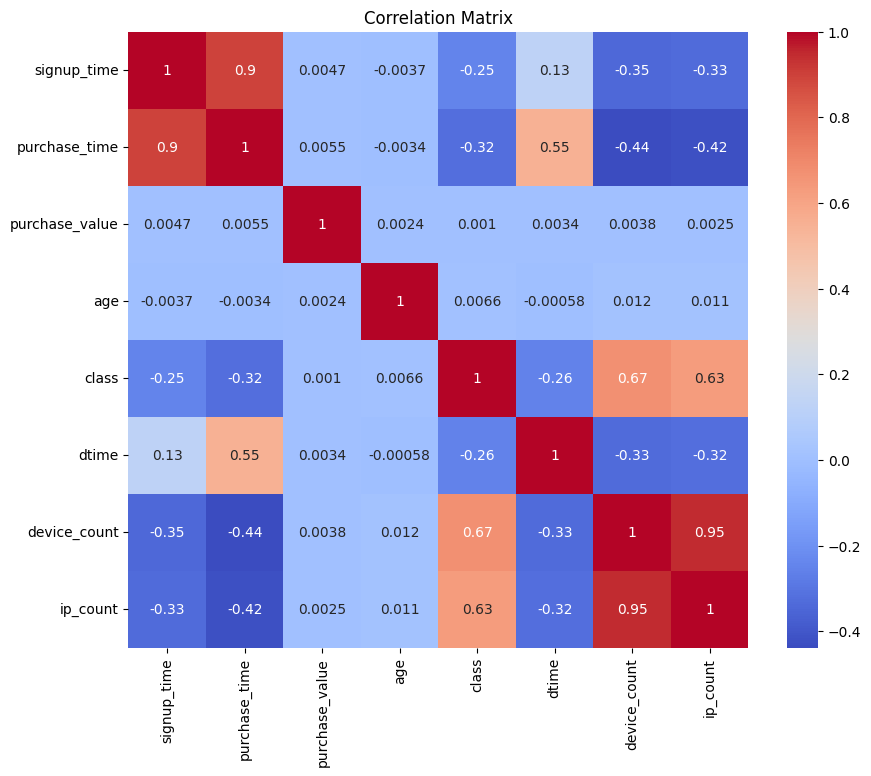

In [17]:
# plot correlation matrix
data_cor = data.drop(['user_id', 'device_id', 'source', 'browser', 'sex', 'country', 'ip_address'], axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(data_cor.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- if multiple devices or ips are used, then it shows a signature of fraud

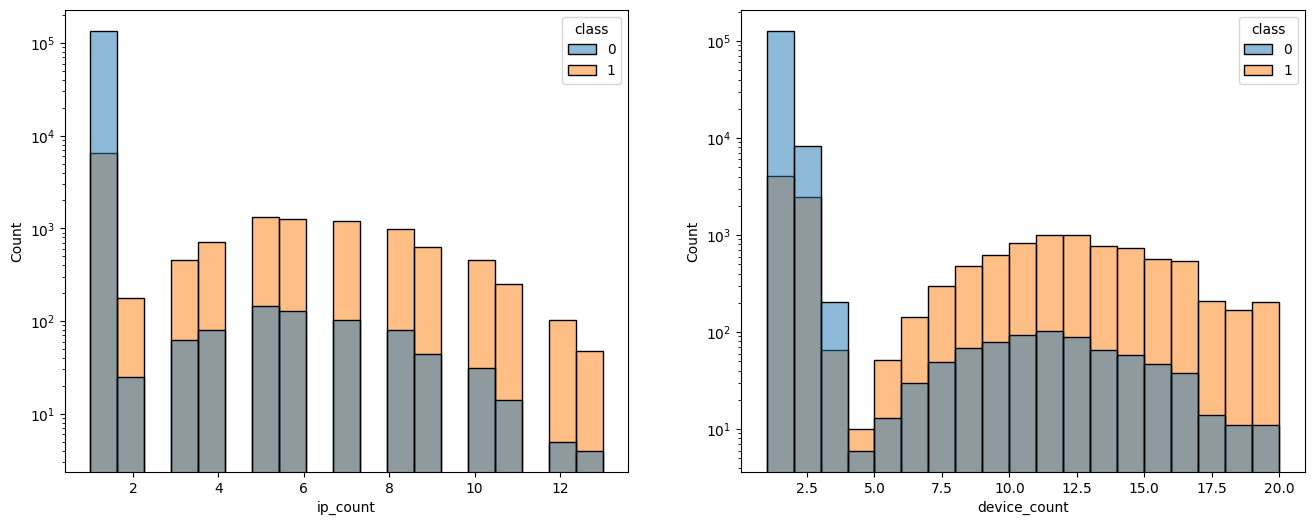

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=data, x='ip_count', hue='class', ax=ax[0])
sns.histplot(data=data, x='device_count', hue='class', ax=ax[1])
ax[0].set_yscale('log')
ax[1].set_yscale('log')
plt.show()

- if >=2 IPs are used, then it's likely fraud
- if >=5 devices are used, then it's likely fraud

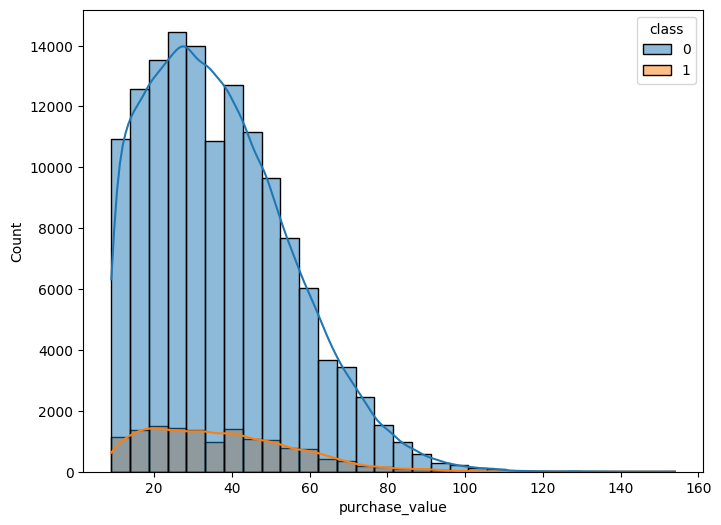

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='purchase_value', hue='class', bins=30, kde=True)
plt.show()

- fraud tends to be small money (<$60)

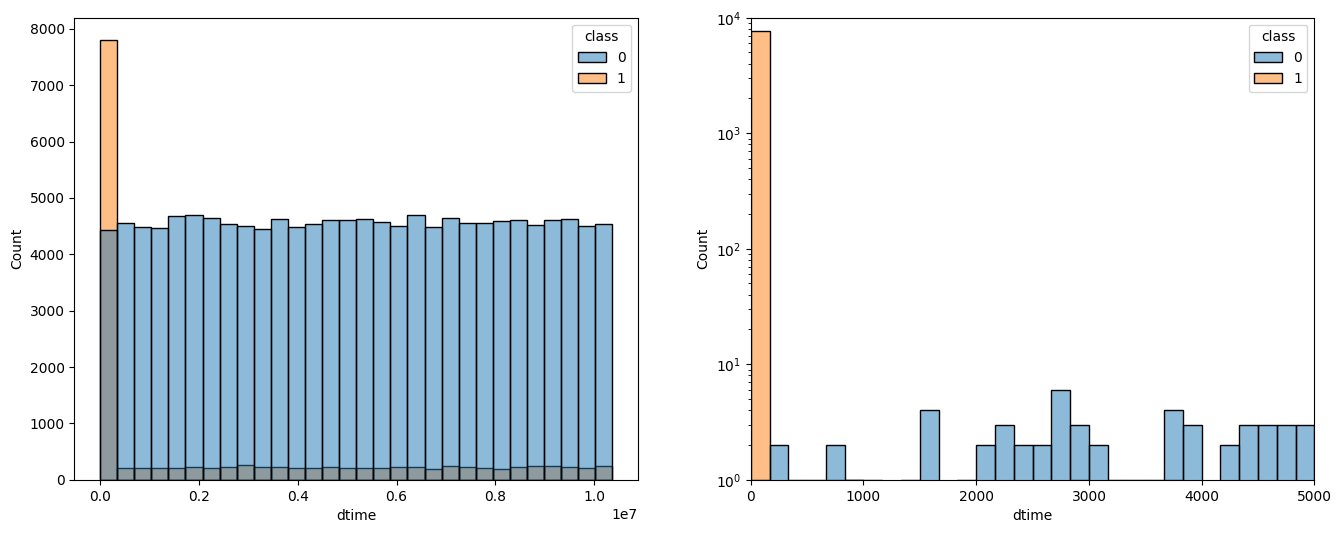

In [25]:
zoomin = 5e3
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=data, x='dtime', hue='class', bins=30, ax=ax[0])
sns.histplot(data=data, x='dtime', hue='class', bins=30, binrange=(0, zoomin), ax=ax[1])
ax[1].set_xlim(0, zoomin)
ax[1].set_ylim(1, 1e4)
ax[1].set_yscale('log')
plt.show()

- fraud tends to be quick and short after register
- usually less than 1000/6 second = 2.7 min

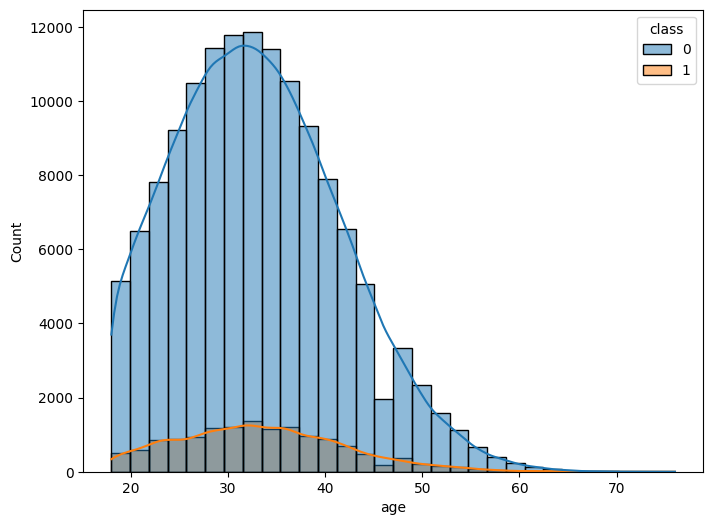

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='age', hue='class', bins=30, kde=True)
plt.show()

- sortof uniform below age=50

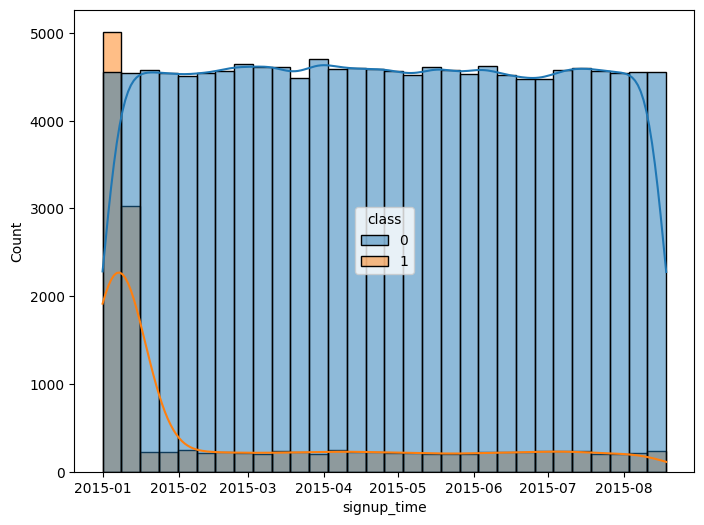

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='signup_time', hue='class', bins=30, kde=True)
plt.show()

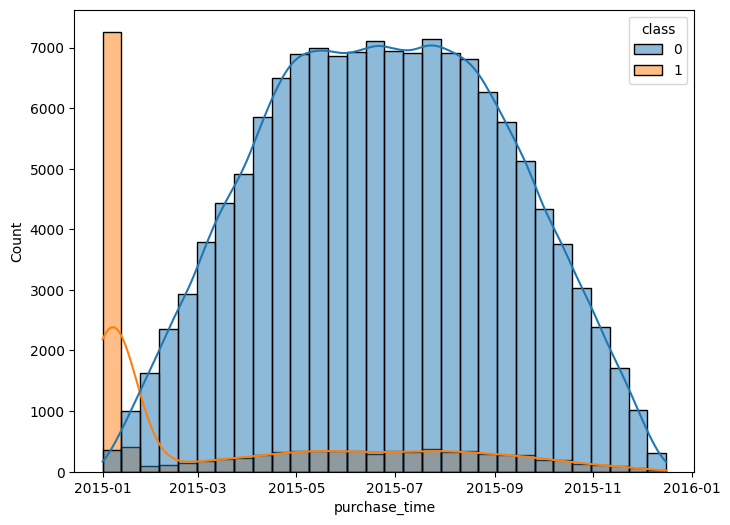

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='purchase_time', hue='class', bins=30, kde=True)
plt.show()

source
Ads       0.092066
Direct    0.105370
SEO       0.089285
dtype: float64


<Axes: xlabel='source', ylabel='count'>

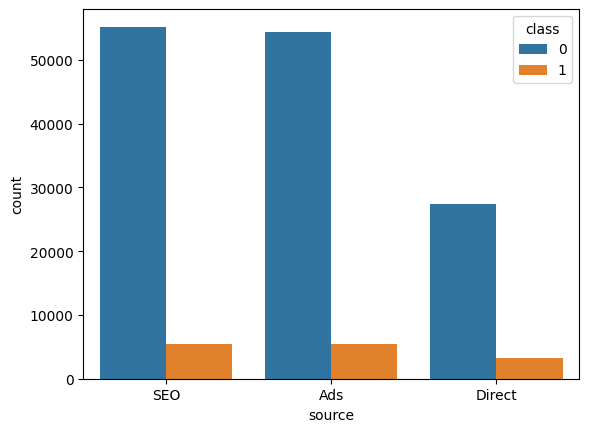

In [29]:
source_fraud = data[data['class'] == 1].groupby('source').size() / data.groupby('source').size()
print(source_fraud)
sns.countplot(x='source', hue='class', data=data)

- uniform across source

browser
Chrome     0.098792
FireFox    0.095165
IE         0.086775
Opera      0.089227
Safari     0.090201
dtype: float64


<Axes: xlabel='browser', ylabel='count'>

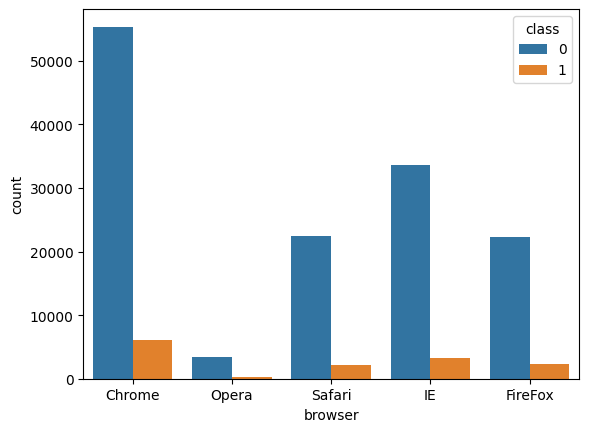

In [30]:
browser_fraud = data[data['class'] == 1].groupby('browser').size() / data.groupby('browser').size()
print(browser_fraud)
sns.countplot(x='browser', hue='class', data=data)

- uniform across browser

sex
F    0.091007
M    0.095523
dtype: float64


<Axes: xlabel='sex', ylabel='count'>

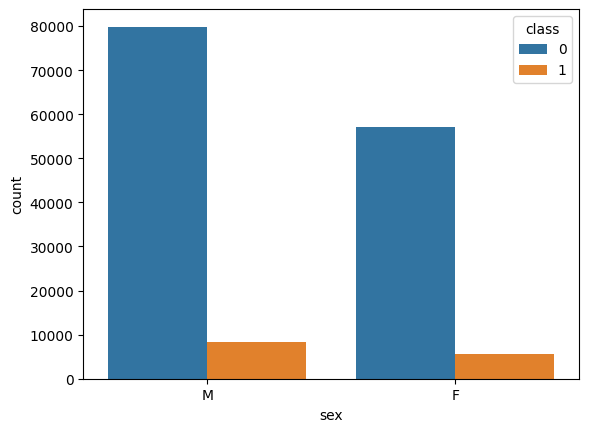

In [31]:
sex_fraud = data[data['class'] == 1].groupby('sex').size() / data.groupby('sex').size()
print(sex_fraud)
sns.countplot(x='sex', hue='class', data=data)

- uniform across sex

In [32]:
mean_fraud = data['class'].mean()
std_fraud = data['class'].std()
country_fraud = data[data['class'] == 1].groupby('country').size() / data.groupby('country').size()
country_fraud = country_fraud.sort_values(ascending=False)
country_fraud_top = country_fraud[country_fraud > mean_fraud]
print(country_fraud_top[:10])
print('\nMean fraud rate all countries', mean_fraud)
print('Std fraud rate all countries', std_fraud)

country
Turkmenistan             1.000000
Namibia                  0.434783
Sri Lanka                0.419355
Luxembourg               0.388889
Virgin Islands (U.S.)    0.333333
Ecuador                  0.264151
Tunisia                  0.262712
Peru                     0.260504
Bolivia                  0.245283
Kuwait                   0.233333
dtype: float64

Mean fraud rate all countries 0.09364577267192546
Std fraud rate all countries 0.29133623807208336


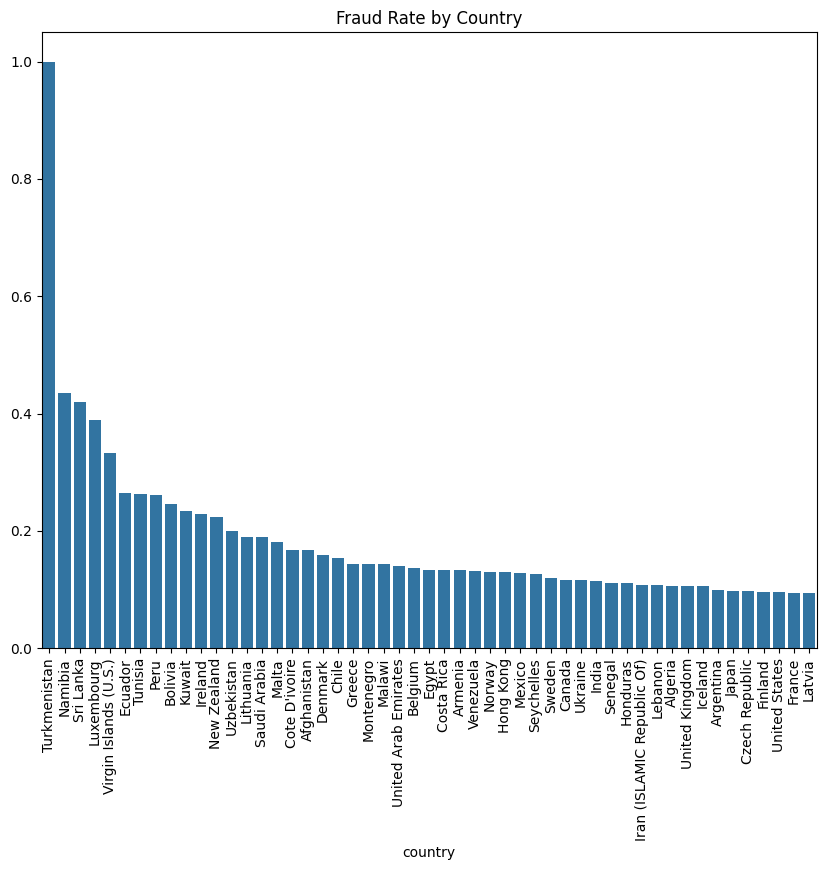

In [33]:
# plot country_fraud_top
plt.figure(figsize=(10, 8))
sns.barplot(x=country_fraud_top.index, y=country_fraud_top.values)
plt.xticks(rotation=90)
plt.title('Fraud Rate by Country')
plt.show()

- some countries tend to have higher fraud rate

In [34]:
did_fraud = data[data['class'] == 1].groupby('device_id').size()
did_fraud = did_fraud.sort_values(ascending=False)
print(did_fraud[:10])

device_id
CQTUVBYIWWWBC    19
EQYVNEGOFLAWK    19
NGQCKIADMZORL    19
ZUSVMDEZRBDTX    19
KIPFSCNUGOLDP    19
ITUMJCKWEYNDD    19
IGKYVZDBEGALB    18
EGLGSEGYPMMAM    18
BWSMVSLCJXMCM    18
CDFXVYHOIHPYP    18
dtype: int64


- backlist these device id

In [39]:
ip_fraud = data[data['class'] == 1].groupby('ip_address').size()
ip_fraud = ip_fraud.sort_values(ascending=False)
print(ip_fraud)

ip_address
3.503224e+09    12
6.771480e+08    12
2.871248e+09    12
1.886528e+09    12
1.502818e+09    12
                ..
1.556629e+09     1
1.556160e+09     1
1.556099e+09     1
1.555045e+09     1
4.294131e+09     1
Length: 8023, dtype: int64


- backlist these IP

# Modeling

In [41]:
data_model = data.drop(['user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address'], axis=1)

In [42]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [ ]:
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /home/wei-chih/.local/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpfand2d7w
  JVM stdout: /tmp/tmpfand2d7w/h2o_wei_chih_started_from_python.out
  JVM stderr: /tmp/tmpfand2d7w/h2o_wei_chih_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_wei_chih_pc8coi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.770 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [44]:
h2o_df = H2OFrame(data_model)
h2o_df['class'] = h2o_df['class'].asfactor()
h2o_df.summary()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


/tmp/ipykernel_7960/825884948.py:3: H2ODeprecationWarning: ``summary()`` is deprecated, please use ``show_summary()`` or ``get_summary()`` instead
  h2o_df.summary()


,purchase_value,source,browser,sex,age,class,country,dtime,device_count,ip_count
type,int,enum,enum,enum,int,enum,enum,int,int,int
mins,9.0,,,,18.0,,,1.0,1.0,1.0
mean,36.935372438985866,,,,33.140703584096784,,,4932029.248623609,1.684366562549631,1.3041849753825043
maxs,154.0,,,,76.0,,,10367972.0,20.0,13.0
sigma,18.322762148662118,,,,8.617733490961458,,,3126263.1184442965,2.6169536028041716,1.3672671245454886
zeros,0,,,,0,,,0,0,0
missing,0,0,0,0,0,0,0,0,0,0
0,34.0,SEO,Chrome,M,39.0,0,Japan,4506682.0,1.0,1.0
1,16.0,Ads,Chrome,F,53.0,0,United States,17944.0,1.0,1.0
2,15.0,SEO,Opera,M,53.0,1,United States,1.0,12.0,8.0


In [45]:
feature_cols = h2o_df.columns
target_col = 'class'
feature_cols.remove(target_col)

strat_split = h2o_df[target_col].stratified_split(test_frac=0.25, seed=42)
train = h2o_df[strat_split == 'train']
test = h2o_df[strat_split == 'test']

In [47]:
# random forest
model = H2ORandomForestEstimator(balance_classes=True, ntrees=100, max_depth=20, mtries=-1, seed=42, score_each_iteration=True)
model.train(x=feature_cols, y=target_col, training_frame=train, validation_frame=test);

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


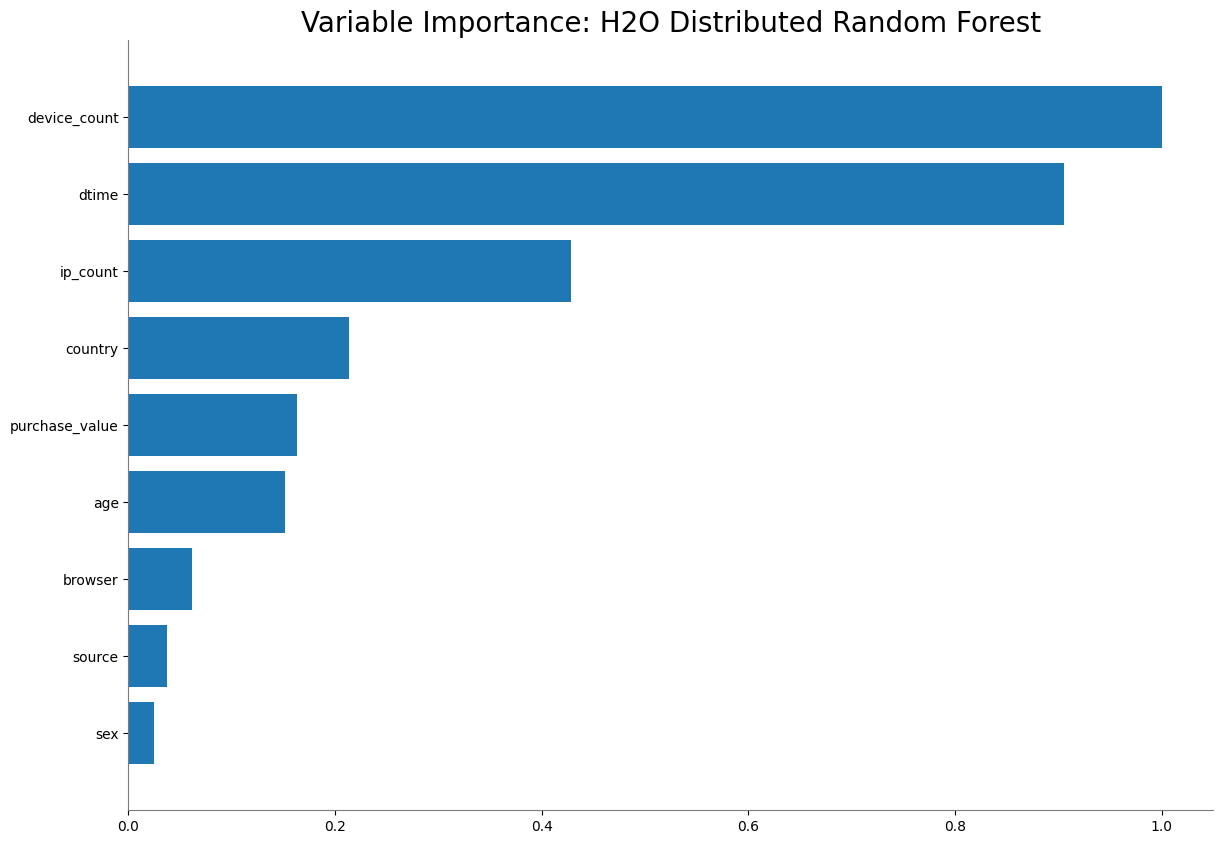

<Figure size 640x480 with 0 Axes>

In [48]:
model.varimp_plot();

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


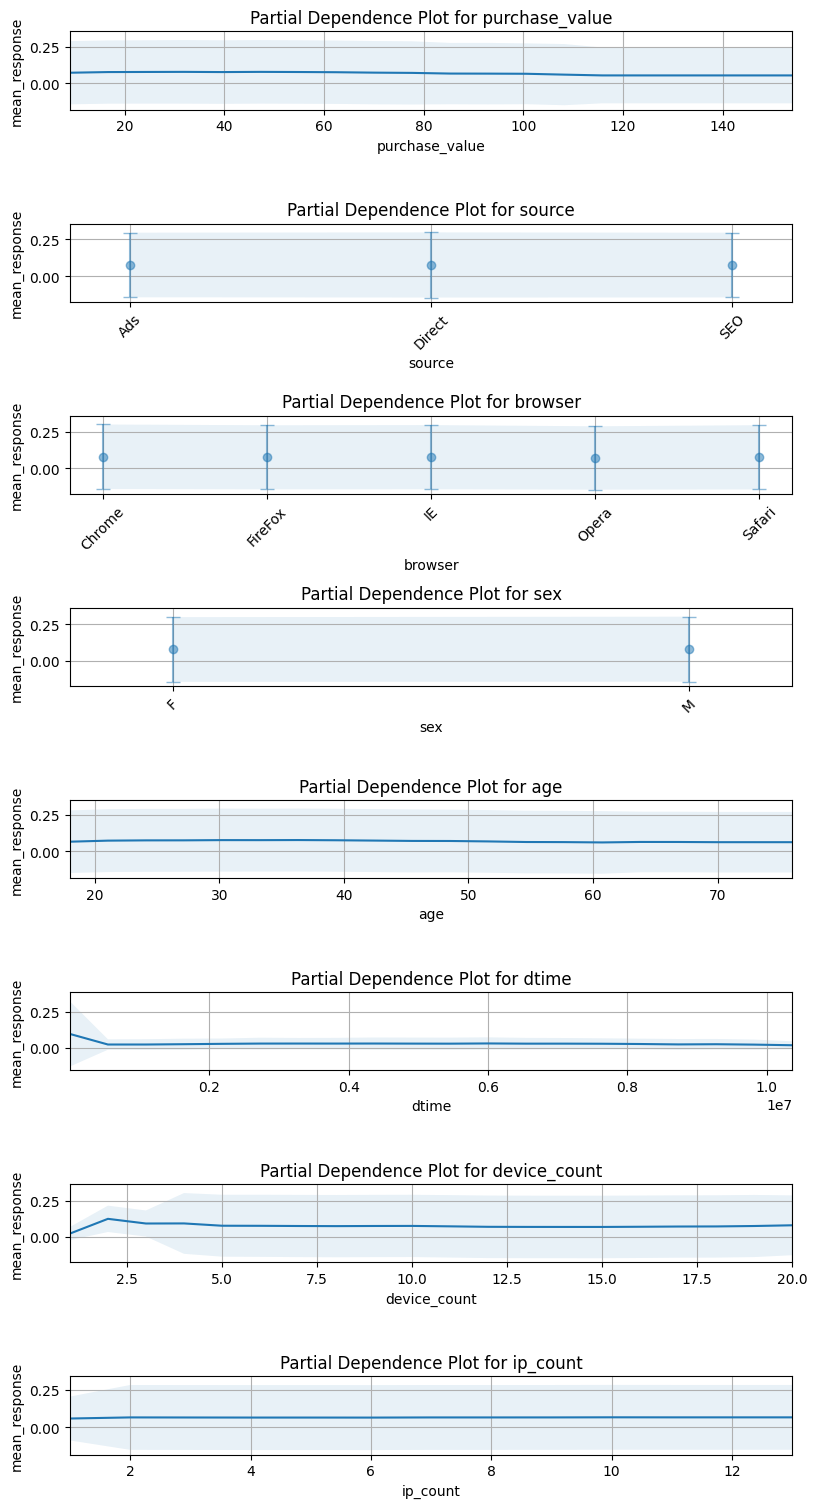

In [49]:
feature_cols_noid = feature_cols.copy()
feature_cols_noid.remove('country')
model.partial_plot(train, cols=feature_cols_noid, figsize=(8, 15));

In [50]:
perf = model.model_performance(test)
perf

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.04026505929157857
RMSE: 0.2006615540943969
LogLoss: 0.17907150904477057
Mean Per-Class Error: 0.22910304940221785
AUC: 0.8415204680293529
AUCPR: 0.710954804598305
Gini: 0.6830409360587057

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2540963526991103
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      34200  40    0.0012   (40.0/34240.0)
1      1617   1921  0.457    (1617.0/3538.0)
Total  35817  1961  0.0439   (1657.0/37778.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.254096     0.698672  52
max f2                       0.0567099    0.657637  207
max f0point5                 0.419681     0.852058  24
max accuracy                 0.419681     0.956509  24
max precision                1            1         0
max recall                   2.09293e-05  1         399
max specificity              1            1         0
max absolute_mcc             0.419681     0.714886  24
max min_per_class_accuracy   0.0271231    0.761741  275
max mean_per_class_accuracy  0.0481802    0.816144  217
max tns                      1            34240     0
max fns                      1            1830      0
max fps                      2.09293e-05  34240     399
max tps                      2.09293e-05  3538      399
max tnr                      1            1         0
max fnr                      1            0.517241  0
max fpr                      2.09293e-05  1         399
max tpr                      2.09293e-05  1         399

Gains/Lift Table: Avg response rate:  9.37 %, avg score:  7.42 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.0452115                   1                  10.6778   10.6778            1                1           1                           1                   0.482759        0.482759                   967.778    967.778            0.482759
2        0.0500026                   0.504432           10.6778   10.6778            1                0.984165    1                           0.998483            0.0511588       0.533917                   967.778    967.778            0.533917
3        0.100005                    0.07553            2.52672   6.60225            0.236633         0.142642    0.618317                    0.570562            0.126343        0.66026                    152.672    560.225            0.618146
4        0.150008                    0.0363168          0.99486   4.73312            0.093171         0.0475487   0.443268                    0.396224            0.0497456       0.710006                   -0.514029  373.312            0.617862
5        0.200011                    0.0314034          0.469167  3.66713            0.0439386        0.0335666   0.343436                    0.30556             0.0234596       0.733465                   -53.0833   266.713            0.588576
6        0.300016                    0.0265064          0.350462  2.56158            0.0328216        0.028751    0.239898                    0.21329             0.035048        0.768513                   -64.9538   156.158            0.516907
7        0.399995                    0.0228992          0.336419  2.0054             0.0315065        0.0246276   0.18781                     0.166134            0.0336348       0.802148                   -66.3581   100.54             0.443708
8     

In [ ]:
predict = model.predict(test)
predict

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.97713,0.0228704
0,0.978517,0.0214832
0,0.986823,0.0131766
0,0.973238,0.0267623
0,0.974384,0.0256163
0,0.993055,0.0069446
0,0.989317,0.0106827
0,0.95467,0.0453301
0,0.997431,0.00256925
0,0.966265,0.0337347


In [ ]:
# merge predict with test
test_df = test.as_data_frame()
predict_df = predict.as_data_frame()
test_df['predict'] = predict_df['predict']
test_df['predict'] = test_df['predict'].astype('int')
test_df.head()

/home/wei-chih/.local/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/home/wei-chih/.local/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,purchase_value,source,browser,sex,age,class,country,dtime,device_count,ip_count,predict
0,44,SEO,Safari,M,41,0,Unknown,492085,1,1,0
1,13,Ads,Safari,F,35,0,United States,9430366,1,1,0
2,58,Direct,Chrome,M,32,0,Unknown,1517036,1,1,0
3,24,Direct,FireFox,F,23,0,Unknown,981368,1,1,0
4,47,SEO,Chrome,F,24,0,China,7107676,1,1,0


In [51]:
perf.accuracy()

[[0.4196805533312649, 0.9565090793583567]]

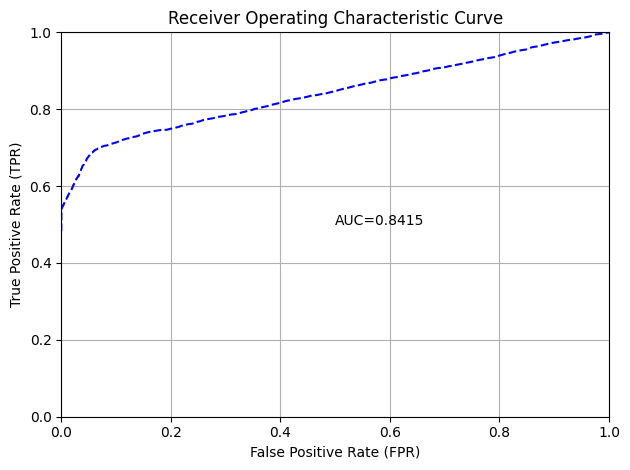

In [52]:
perf.plot(type="roc");

In [ ]:
# row is actual, column is predict
model.confusion_matrix(train=False)

,0,1,Error,Rate
0,95224.0,7497.0,0.073,(7497.0/102721.0)
1,2047.0,100740.0,0.0199,(2047.0/102787.0)
Total,97271.0,108237.0,0.0464,(9544.0/205508.0)


In [56]:
h2o.cluster().shutdown()

H2O session _sid_a3ff closed.


# Conclusion
- if the time between signup and purchase is less than 3 minutes, then it's likely fraud
- IP from `country_fraud_top` (eg. Namibia, Sri Lanka, Luxembourg, Virgin Islands (U.S.), Ecuador, Tunisia) is likely fraud
- small money (<$60) is typically fraud
- blacklist some IP and device_id `did_fraud`

If a fraud is detected, then do some checks (email, text, phone voice, etc) to confirm it's fraud or not

# Improvements
- create columns like "multiple user_id but same ip", "multiple user_id but same device_id", "week number in a year", "weekday"